# Lid-driven cavity

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1=ib.stretching(35, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s1=np.r_[s1, 2*s1[-1]-s1[-2::-1]]
s1/=s1[-1]

s2=ib.stretching(42, 0.03125/4, 0.03125, 4, 8, 8, 0.04)
s2=np.r_[s2, 2*s2[-1]-s2[-2::-1]]
s2/=s2[-1]

solver = ib.Solver(x=s1, y=s2, iRe=1/1000, Co=0.75, fractionalStep=False)

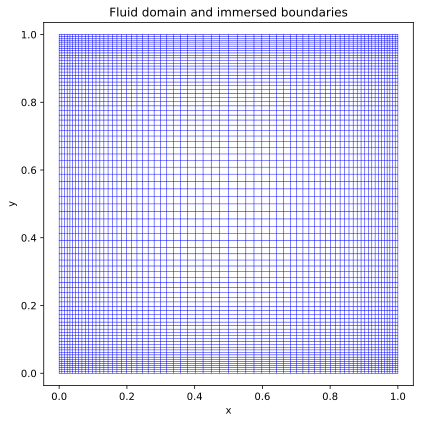

In [4]:
solver.plot_domain()

## Boundary conditions

In [5]:
uBC, vBC = solver.zero_boundary_conditions()
uBC[3][:] = 1

## Unsteady simulation

In [6]:
%time x, = solver.steps(solver.zero(), uBC, vBC, number=int(50/solver.dt), reportEvery=int(5/solver.dt))

  step      t        residual   
  1201    4.998768 5.304495e-04 
  2402    9.997535 2.488233e-04 
  3603   14.996303 1.271830e-04 
  4804   19.995070 5.481781e-05 
  6005   24.993838 2.042567e-05 
  7206   29.992606 7.642496e-06 
  8407   34.991373 3.228591e-06 
  9608   39.990141 1.646788e-06 
 10809   44.988908 9.788475e-07 
 12010   49.987676 6.339696e-07 
CPU times: user 43min 55s, sys: 1min, total: 44min 56s
Wall time: 1min 36s


## Display results

Plot velocity components and pressure.

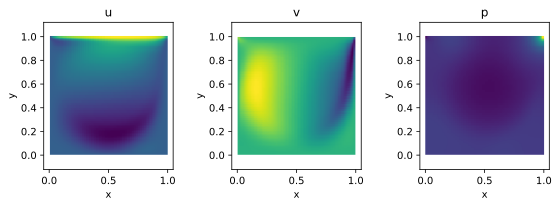

In [7]:
solver.plot_field(x, xlim=(0, 1), ylim=(0, 1))

Check results against Ghia et al. (1982)

In [8]:
ghia = np.loadtxt("11-LidDrivenCavityRe1000_Ghia.csv", skiprows=1)

In [9]:
u, v, p = solver.reshape(*solver.unpack(x))

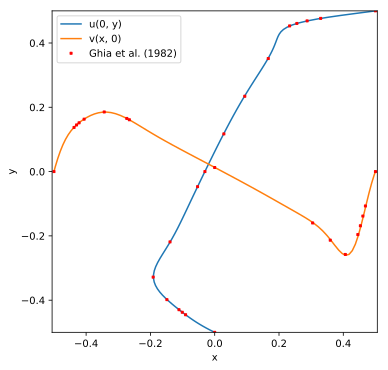

In [10]:
plt.figure(figsize=(5.5, 5.25))

ui = solver.fluid.u.shape[1]//2
uu = np.r_[uBC[2][ui], u[:,ui], uBC[3][ui]]
uy = np.r_[solver.fluid.y[0], solver.fluid.u.y, solver.fluid.y[-1]]
plt.plot(0.5*uu, uy-0.5, label='u(0, y)');
plt.plot(0.5*ghia[:,1], ghia[:,0]-0.5,'sr', ms=2)

vi = solver.fluid.v.shape[0]//2
vv = np.r_[vBC[0][vi], v[vi,:], vBC[1][vi]]
vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]
plt.plot(vx-0.5, 0.5*vv, label='v(x, 0)');
plt.plot(ghia[:,2]-0.5, 0.5*ghia[:,3],'sr', ms=2, label='Ghia et al. (1982)')
plt.axis('equal')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);